In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:

#WITHOUT DELETION: Groups 0, 1, 8, 9, 10, 11 are R4
input_path_R1 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211221_RESI_newVoyager_FusionBT_R1R3_nodel/resi-analysis_2/R1_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"
input_path_R3 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211221_RESI_newVoyager_FusionBT_R1R3_nodel/resi-analysis_2/R3_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"

#WITH DELETION: Groups 0, 1, 8, 9, 10, 11 are R4
#input_path_R1 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211130_RESI_R1-5pr_2del_R3-3pr_R4_single_align/resi-analysis_2/R1_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"
#input_path_R3 = "/Volumes/pool-miblab4/users/steen/z.microscopy_raw/02_Project_RESI/211130_RESI_R1-5pr_2del_R3-3pr_R4_single_align/resi-analysis_2/R3_apicked_ori-all_aligned_resi_4_50_info_merge_avg-appl_apicked.hdf5"

R1_table = pd.read_hdf(input_path_R1, key = 'locs')
R3_table = pd.read_hdf(input_path_R3, key = 'locs')
R1_table.sort_values(by=['group', 'frame'])
R3_table.sort_values(by=['group', 'frame'])

Minx = min(R1_table["x"].min(), R3_table["x"].min())*130 -5
Miny = max(R1_table["y"].max(), R3_table["y"].max())*130 +5

maxOuter = max(((max(R1_table["x"].max(), R3_table["x"].max())*130)-Minx), (-(min(R1_table["y"].min(), R3_table["y"].min())*130)+Miny)) +5

R1_table["x"] = 130*R1_table["x"]-Minx
R3_table["x"] = 130*R3_table["x"]-Minx
R1_table["y"] = -(130)*R1_table["y"]+Miny
R3_table["y"] = -(130)*R3_table["y"]+Miny

In [3]:
R4_positions_R1_channel = []
R4_std_R1_channel = []
R4_positions_R3_channel = []
R4_std_R3_channel = []

for i in (0,1,8,9,10,11):
#for i in (0,1,2,3,10,11):
    R1 = (R1_table[R1_table["group"] == i])
    Avg_R1 = R1["x"].mean(), R1["y"].mean()
    Std_R1 = R1["x"].std(), R1["y"].std()
    R3 = (R3_table[R3_table["group"] == i])
    Avg_R3 = R3["x"].mean(), R3["y"].mean()
    Std_R3 = R3["x"].std(), R3["y"].std()
    
    R4_positions_R1_channel.append(Avg_R1)
    R4_std_R1_channel.append(Std_R1)
    R4_positions_R3_channel.append(Avg_R3)
    R4_std_R3_channel.append(Std_R3)
    
R4_positions_R1_channel = np.asarray(R4_positions_R1_channel)
R4_positions_R3_channel = np.asarray(R4_positions_R3_channel)
R4_std_R1_channel = np.asarray(R4_std_R1_channel)
R4_std_R3_channel = np.asarray(R4_std_R3_channel)

R4_differences = (R4_positions_R1_channel - R4_positions_R3_channel)

R4_distances = (np.sqrt(R4_differences[:,0]**2 + R4_differences[:,1]**2))

print(R4_differences)
print(R4_distances)



print("R4 from R1 channel std: ", np.mean(R4_std_R1_channel, axis=0))
print("R4 from R3 channel std: ", np.mean(R4_std_R3_channel, axis=0))

[[ 0.10553932  0.21909332]
 [ 0.09010172  0.25752258]
 [-0.11485672 -0.08600235]
 [ 0.14519501 -0.35147476]
 [ 0.0052948  -0.20373917]
 [-0.16011429 -0.18920612]]
[0.24318806 0.27282998 0.14348683 0.38028423 0.20380796 0.24786194]
R4 from R1 channel std:  [1.34430395 1.45169828]
R4 from R3 channel std:  [1.40766515 1.4659215 ]


In [4]:
R1_resi = []
R1_resi_std = []
R3_resi = []
R3_resi_std = []

for i in (2,3,4,5,6,7):
#for i in (4,5,6,7,8,9):
    R1 = (R1_table[R1_table["group"] == i])
    Avg_R1 = R1["x"].mean(), R1["y"].mean()
    Std_R1 = R1["x"].std(), R1["y"].std()
    R3 = (R3_table[R3_table["group"] == i])
    Avg_R3 = R3["x"].mean(), R3["y"].mean()
    Std_R3 = R3["x"].std(), R3["y"].std()
    
    R1_resi.append(Avg_R1)
    R1_resi_std.append(Std_R1)
    R3_resi.append(Avg_R3)
    R3_resi_std.append(Std_R3)
    
R1_resi = np.asarray(R1_resi)
R3_resi = np.asarray(R3_resi)
R1_resi_std = np.asarray(R1_resi_std)
R3_resi_std = np.asarray(R3_resi_std)

Resi_differences = (R1_resi - R3_resi)
Resi_distances = (np.sqrt(Resi_differences[:,0]**2 + Resi_differences[:,1]**2))

print(Resi_differences)
print(Resi_distances)

print("R1 std: ", np.mean(R1_resi_std, axis=0))
print("R3 std: ", np.mean(R3_resi_std, axis=0))

[[-1.12090683  0.4122467 ]
 [-1.43300819 -0.03483582]
 [-1.27166367  0.5317688 ]
 [-1.3986969  -0.13740158]
 [-1.38252258  0.14503479]
 [-1.59502411 -0.10848808]]
[1.19431129 1.43343155 1.37837097 1.40542955 1.39010927 1.59870935]
R1 std:  [0.95483633 1.06797478]
R3 std:  [1.35638946 1.39748021]


(0.0, 94.92767333984375)

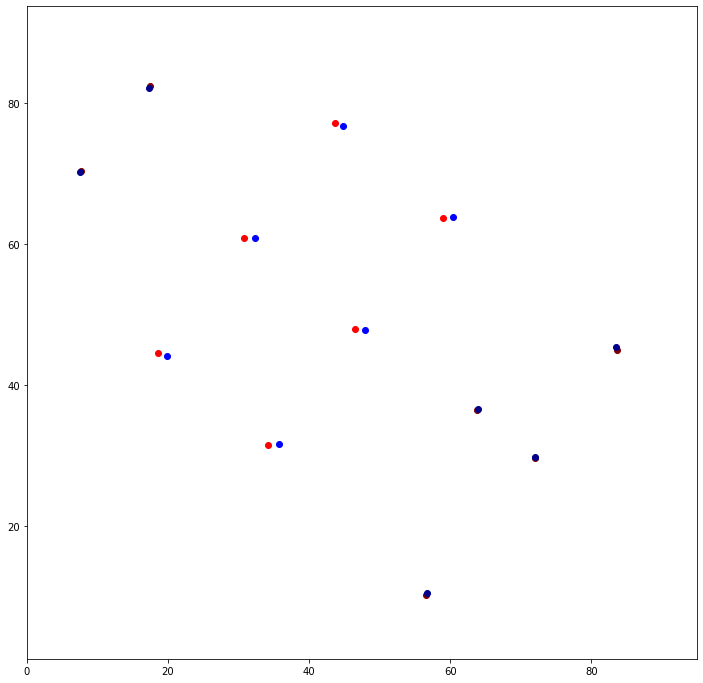

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.axis('equal')

ax.scatter(R1_resi[:,0], R1_resi[:,1], color = "red", label = "R1")
ax.scatter(R3_resi[:,0], R3_resi[:,1], color = "blue", label = "R3")

ax.scatter(R4_positions_R1_channel[:,0], R4_positions_R1_channel[:,1], color = "maroon", label = "R4 from R1 channel")
ax.scatter(R4_positions_R3_channel[:,0], R4_positions_R3_channel[:,1], color = "darkblue", label = "R4 from R3 channel")

ax.set_ylim(0, maxOuter)
ax.set_xlim(0, maxOuter)

In [9]:
R4_cloudsizes = []
for i in (0,1,8,9,10,11):
    a = R1_table[R1_table["group"]==i]
    b = R3_table[R3_table["group"]==i]
    new_group = a.append(b)
    R4_cloudsizes.append((new_group["x"].mean(), new_group["y"].mean()))

R1_3_cloudsizes = []
for i in (2,3,4,5,6,7):
    a = R1_table[R1_table["group"]==i]
    b = R3_table[R3_table["group"]==i]
    new_group = a.append(b)
    R1_3_cloudsizes.append((new_group["x"].mean(), new_group["y"].mean()))
    
R4_cloudsizes = np.asarray(R4_cloudsizes)
R1_3_cloudsizes = np.asarray(R1_3_cloudsizes)

print(R4_cloudsizes)
print(R1_3_cloudsizes)

[[ 4175.56201172 -4089.33300781]
 [ 4165.71777344 -4101.28710938]
 [ 4222.01708984 -4135.01416016]
 [ 4241.69384766 -4126.38671875]
 [ 4230.14404297 -4141.81787109]
 [ 4214.84179688 -4161.20166016]]
[[ 4202.47216797 -4094.70239258]
 [ 4189.76611328 -4110.75585938]
 [ 4177.29541016 -4127.22412109]
 [ 4217.90283203 -4107.80371094]
 [ 4205.41943359 -4123.71386719]
 [ 4193.22900391 -4140.04199219]]
